# MOD 1 Project - King County Housing Data

Student Name: Rutuja Patil 
Student Pace : Part Time 
Instructor : Pablo

## Goal

To predict houses prices for King County Location

## Importing Data

In [1]:
#importing all the libraries that we might need.
import pandas as pd
import numpy as np

In [2]:
#importing librabries for plotting graphs(visualization)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing libraries and packages to perform stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

## Dataset

Here we are exploring dataset acquired from kaggle, KC house data. It contains information about different houses, its location, year built, its price, bedroom,bathroom etc. Total 21 columns.

## Column of KC Housing data

- id - unique identified for a house
- dateDate - house was sold
- pricePrice - is prediction target
- bedroomsNumber - of Bedrooms/House
- bathroomsNumber - of bathrooms/bedrooms
- sqft_livingsquare - footage of the home
- sqft_lotsquare - footage of the lot
- floorsTotal - floors (levels) in house
- waterfront - House which has a view to a waterfront
- view - Has been viewed
- condition - How good the condition is ( Overall )
- grade - overall grade given to the housing unit, based on King County grading system
- sqft_above - square footage of house apart from basement
- sqft_basement - square footage of the basement
- yr_built - Built Year
- yr_renovated - Year when house was renovated
- zipcode - zip
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Here date is when the house was sold and view is not the house view but it means if the house is viewed or not.

In [4]:
#using read_csv to read the file and storing it in df
df = pd.read_csv('kc_house_data.csv')

In [5]:
#lets look at the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
#lets check the dtype of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Cleaning

In [8]:
#checking if the values are null
df.isna().sum()/len(df)*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

 We can see that waterfront,view and yr_renovated have null value. Let's start treating them.

## Waterfront

In [9]:
#finding the unique values in waterfront
print(df.waterfront.unique())

[nan  0.  1.]


In [10]:
#checking the percent of these unique values 
print(df.waterfront.value_counts(dropna=False,normalize=True))

0.0    0.883225
NaN    0.110015
1.0    0.006760
Name: waterfront, dtype: float64


In [11]:
#filling NaN with 0
df['waterfront'].fillna(0, inplace=True)

## Year Renovated

In [12]:
#check the unique values
print(df.yr_renovated.unique())

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [13]:
#finding the percent of the unique values
print(df.yr_renovated.value_counts(dropna=False,normalize=True))

0.0       0.787656
NaN       0.177895
2014.0    0.003380
2003.0    0.001435
2013.0    0.001435
2007.0    0.001389
2005.0    0.001343
2000.0    0.001343
1990.0    0.001019
2004.0    0.001019
2009.0    0.000972
1989.0    0.000926
2006.0    0.000926
2002.0    0.000787
1991.0    0.000741
1998.0    0.000741
1984.0    0.000741
1999.0    0.000695
2001.0    0.000695
2008.0    0.000695
2010.0    0.000695
1983.0    0.000695
2015.0    0.000648
1986.0    0.000648
1987.0    0.000648
1994.0    0.000648
1985.0    0.000648
1992.0    0.000602
1995.0    0.000556
1997.0    0.000556
            ...   
1964.0    0.000232
1975.0    0.000232
1973.0    0.000185
1981.0    0.000185
1963.0    0.000185
1969.0    0.000185
1965.0    0.000185
1972.0    0.000139
1956.0    0.000139
1945.0    0.000139
1960.0    0.000139
1978.0    0.000139
1958.0    0.000139
1955.0    0.000139
1974.0    0.000093
1962.0    0.000093
1967.0    0.000093
1940.0    0.000093
1957.0    0.000093
1946.0    0.000046
1959.0    0.000046
1951.0    0.

since Nan is just 2% of the entire data set we will fill those with 0.

In [14]:
# Replacing NaN with 0
df.yr_renovated.fillna(value=0,inplace=True)

In [15]:
#changing the type since year we dont want float
df.yr_renovated = df.yr_renovated.astype('int64')

In [16]:
#checking if the values were dropped
df.yr_renovated.value_counts(normalize=True)

0       0.965551
2014    0.003380
2003    0.001435
2013    0.001435
2007    0.001389
2005    0.001343
2000    0.001343
2004    0.001019
1990    0.001019
2009    0.000972
2006    0.000926
1989    0.000926
2002    0.000787
1998    0.000741
1984    0.000741
1991    0.000741
1999    0.000695
2008    0.000695
2010    0.000695
2001    0.000695
1983    0.000695
1986    0.000648
1985    0.000648
1987    0.000648
2015    0.000648
1994    0.000648
1992    0.000602
1995    0.000556
1993    0.000556
1997    0.000556
          ...   
1975    0.000232
1964    0.000232
1963    0.000185
1969    0.000185
1981    0.000185
1965    0.000185
1973    0.000185
1955    0.000139
1956    0.000139
1972    0.000139
1978    0.000139
1960    0.000139
1958    0.000139
1945    0.000139
1962    0.000093
1967    0.000093
1957    0.000093
1974    0.000093
1940    0.000093
1948    0.000046
1959    0.000046
1934    0.000046
1971    0.000046
1954    0.000046
1950    0.000046
1976    0.000046
1953    0.000046
1951    0.0000

In [17]:
#checking if it got changed to int
df.yr_renovated.dtype

dtype('int64')

 ## View

In [18]:
#now checking the null values in data
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

We see that view has still 63 null values. Lets try to remove those.

In [19]:
#dropping those 63 null values
df.dropna(inplace=True)

In [20]:
##checking if dropped
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Yayy looks like we have removed the null values.

In [21]:
#lets look at our first 10 rows data.
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0,98038,47.3684,-122.031,2390,7570
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,...,8,1860,1700.0,1965,0,98007,47.6007,-122.145,2210,8925


At first glance, we see that sqft basement contains '?' values. Let's clean those first.

In [22]:
#checking the unique values for sqft_basement.
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0',
       '530.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0',
       '1100.0', '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', 

In [23]:
#Let look at the percent of value counts
df.sqft_basement.value_counts(normalize=True)

0.0       0.594316
?         0.020990
600.0     0.010031
500.0     0.009706
700.0     0.009613
800.0     0.009334
400.0     0.008545
1000.0    0.006826
900.0     0.006594
300.0     0.006501
200.0     0.004876
750.0     0.004830
530.0     0.004783
450.0     0.004783
480.0     0.004737
720.0     0.004551
620.0     0.004179
580.0     0.003901
840.0     0.003854
420.0     0.003761
1100.0    0.003622
860.0     0.003622
670.0     0.003576
550.0     0.003529
650.0     0.003483
780.0     0.003483
240.0     0.003436
680.0     0.003390
380.0     0.003390
940.0     0.003297
            ...   
935.0     0.000046
1960.0    0.000046
20.0      0.000046
207.0     0.000046
2610.0    0.000046
1481.0    0.000046
4130.0    0.000046
508.0     0.000046
2500.0    0.000046
1920.0    0.000046
2600.0    0.000046
295.0     0.000046
2050.0    0.000046
1248.0    0.000046
1548.0    0.000046
2400.0    0.000046
1284.0    0.000046
1245.0    0.000046
652.0     0.000046
516.0     0.000046
176.0     0.000046
506.0     0.

In [24]:
#removing the '?' from the dataset
df= df[df.sqft_basement != '?']

In [25]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0',
       '530.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0',
       '1100.0', '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', '350.

In [26]:
#changing the type to float
df.sqft_basement = df.sqft_basement.astype('float64')

In [27]:
df.sqft_basement.dtype

dtype('float64')

In [28]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.108200e+04,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,4.582793e+09,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,0.006688,0.233327,3.409828,7.657717,1789.000000,291.359975,1971.023337,68.359359,98077.858837,47.560371,-122.213843,1986.917418,12732.514135
std,2.876423e+09,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.081509,0.765066,0.650597,1.173690,828.369355,442.007858,29.323120,363.029573,53.528769,0.138568,0.140607,685.544250,27148.781580
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123700e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000
50%,3.904970e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


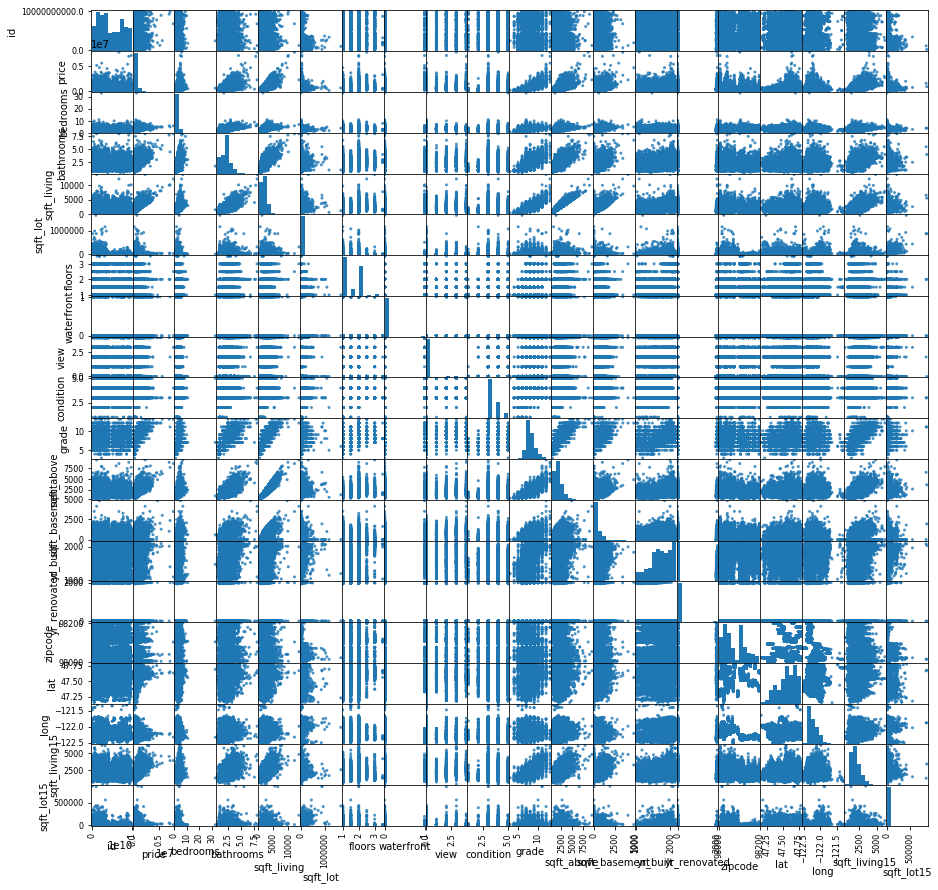

In [29]:
#let's try to plot scatter matrix
pd.plotting.scatter_matrix(df,figsize=(15,15),diagonal='hist',alpha = 0.8)
plt.show()

Its not very clear since we have a lot of features.Normally scatter plot is very useful but in our case we have lots of feature. so lets plot a histogram instead. Let's plot a histogram instead. But first lets remove id and date since we wont need them for now.

In [30]:
#dropping the id and date columns
df = df.drop(columns=['id','date'])

ID and Date doesn't look like they will help us so I am dropping them.

Plotting Histogram to check the distributions our various variables.

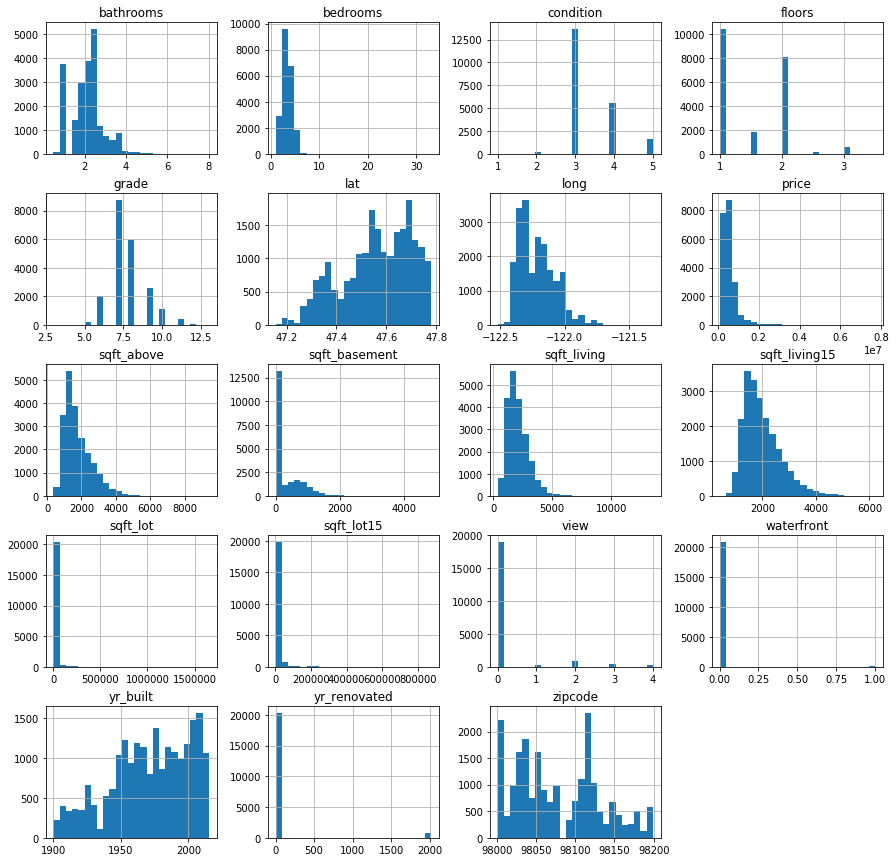

In [31]:
#plotting histogram
df.hist(figsize=(15,15),bins=25);

Columns such as bedrooms, price, sqft_lot, sqft_living seem to have some outliers whereas columns such as condition, floors, grade, bathrooms, view and bathrooms look like categorical variables.

Here it looks like 

## Removing Outliers

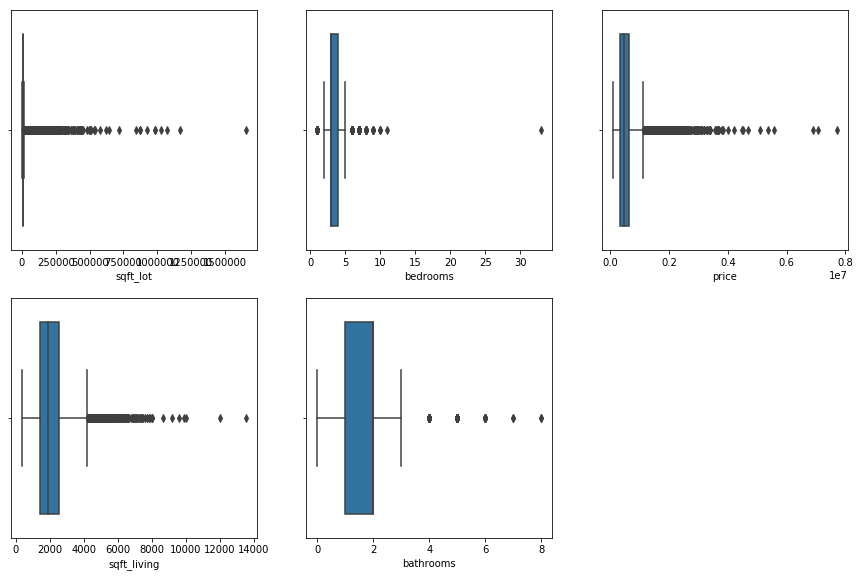

In [32]:
#lets plot the boxplot as we know boxplot is a good way to remove outliers.

plt.figure(figsize=(15,15))
plt.subplot(331)
sns.boxplot(df.sqft_lot)
plt.subplot(332)
sns.boxplot(df.bedrooms)
plt.subplot(333)
sns.boxplot(df.price)
plt.subplot(334)
sns.boxplot(df.sqft_living)
plt.subplot(335)
sns.boxplot(df.bathrooms.astype('int'))

In [33]:
#Lets try to remove these outliers
df = df[df.sqft_lot < 500000]
df = df[df.sqft_living < 8500]
df = df[df.bedrooms < 5]
df = df[df.price < 4000000]
df = df[df.bathrooms < 4]

In [34]:
df.shape

(19017, 19)

## Multicollinearity

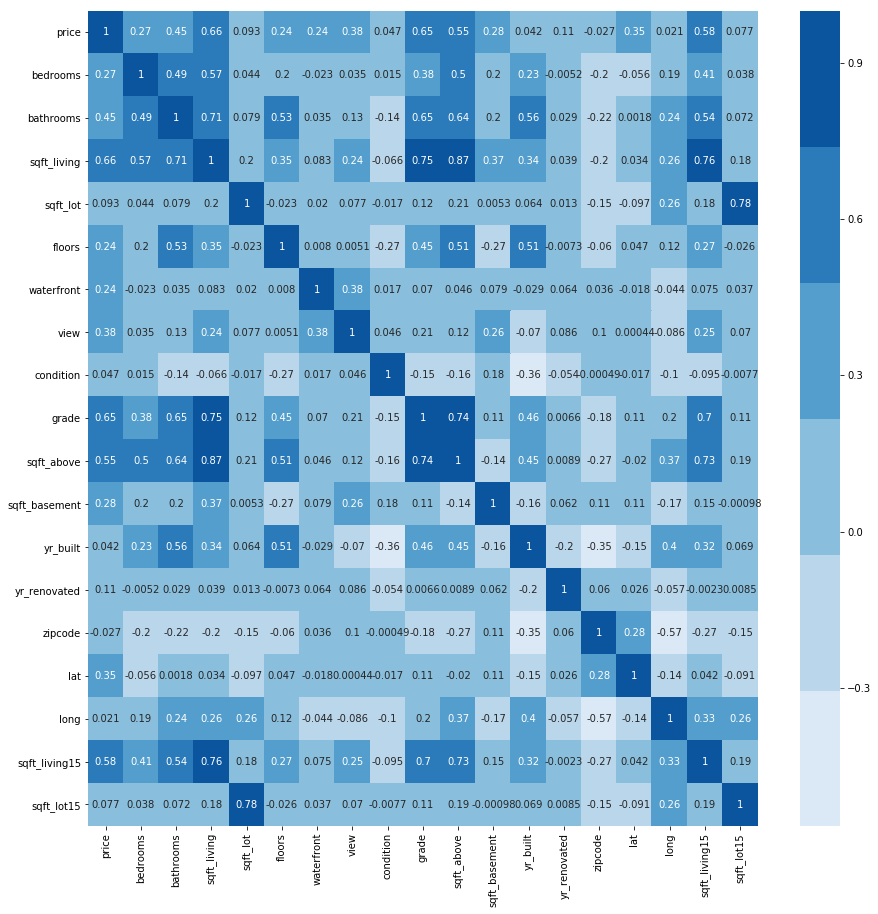

In [35]:
#lets plot the correlation graph using seaborn. The darker the color the more the correlation.
corr= df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap= sns.color_palette('Blues'))
plt.show()

There is a high collinearity between sqft_above and sqft_living so lets drop one of them. Also, similar we have sqft_living & sqft_living15 and sqft_lot and sqft_lot15. Remember our cutoff is 0.75. Bathroom and sqft_living also have high collinearity but lets keep it for now.Grade,if you notice have high collinearity with everything.

In [36]:
df.drop(['grade','sqft_living15','sqft_lot15', 'sqft_above'], axis=1, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19017 entries, 0 to 21596
Data columns (total 15 columns):
price            19017 non-null float64
bedrooms         19017 non-null int64
bathrooms        19017 non-null float64
sqft_living      19017 non-null int64
sqft_lot         19017 non-null int64
floors           19017 non-null float64
waterfront       19017 non-null float64
view             19017 non-null float64
condition        19017 non-null int64
sqft_basement    19017 non-null float64
yr_built         19017 non-null int64
yr_renovated     19017 non-null int64
zipcode          19017 non-null int64
lat              19017 non-null float64
long             19017 non-null float64
dtypes: float64(8), int64(7)
memory usage: 2.3 MB


In [38]:
#taking out price from df and putting it in our variable Target.
target = df.price
df= df.drop(columns=['price'])

In [39]:
import warnings
warnings.filterwarnings('ignore')

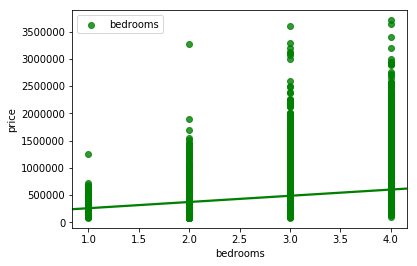

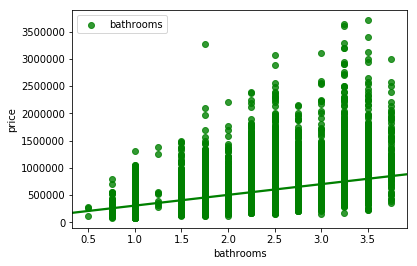

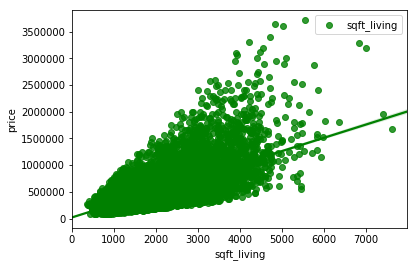

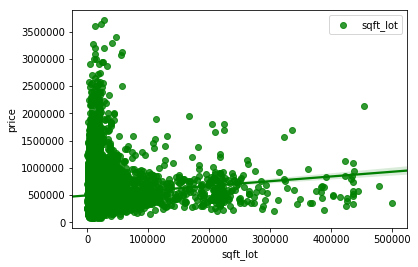

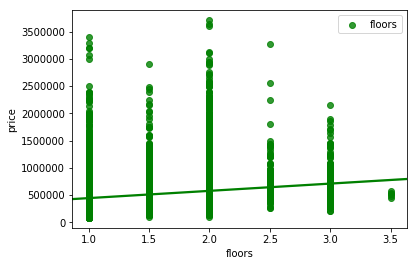

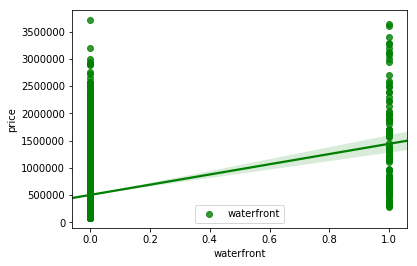

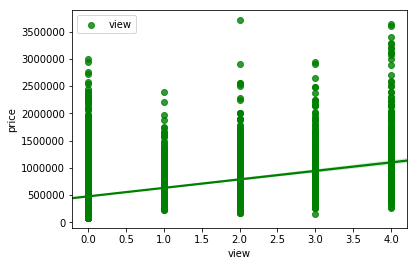

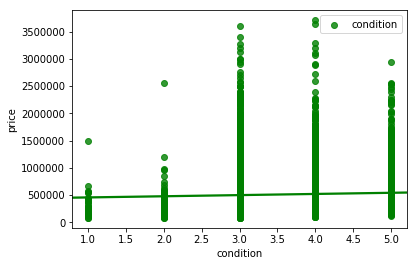

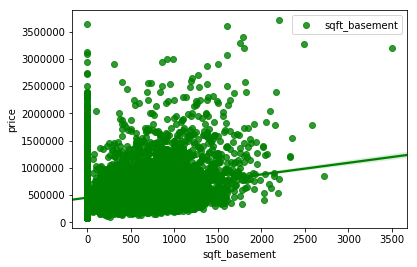

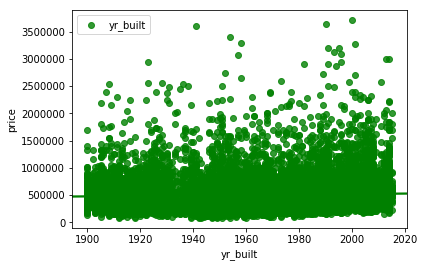

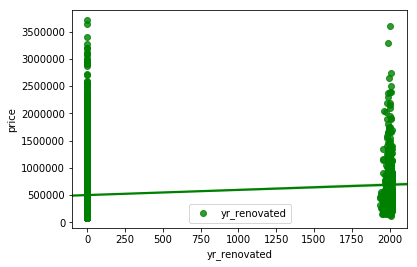

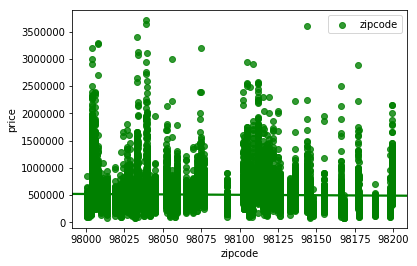

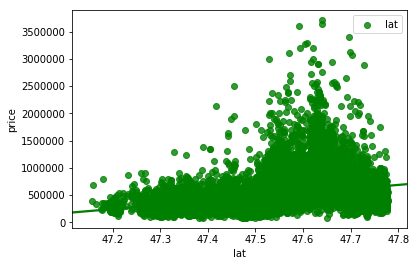

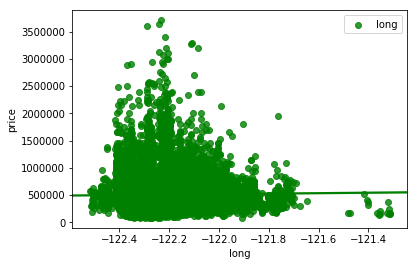

In [40]:
#plotting the variables against price
for col in df:
    sns.regplot(x=df[col], y = target,data=df,label=col,color='g')
    plt.ylabel="PRICE"
    plt.xlabel= 'df[col]'
    plt.legend()
    plt.show()

Here again we see which are categorical and continous variables. We can see some linearity between sqft_living and price.
Basement can be looked as has a basement and doesnt have a basement. Lat and long looks normal

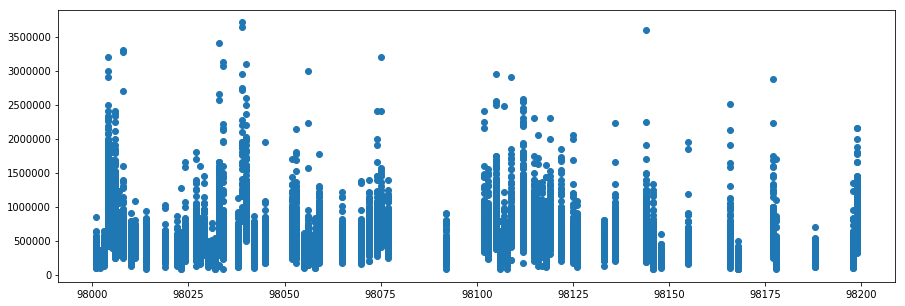

In [41]:
#let's look at zipcode in deep.

plt.figure(figsize=(15, 5))
plt.scatter(df['zipcode'], target)

plt.xlabel= "zipcode"
plt.ylabel= "Price"

Though this looks like continous variable but looking closely it looks like a categorical variable. Lets try to bin it while treating variables.

In [42]:
#dropping waterfront because first we saw maximum is 0.
df = df.drop('waterfront',axis=1)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19017 entries, 0 to 21596
Data columns (total 13 columns):
bedrooms         19017 non-null int64
bathrooms        19017 non-null float64
sqft_living      19017 non-null int64
sqft_lot         19017 non-null int64
floors           19017 non-null float64
view             19017 non-null float64
condition        19017 non-null int64
sqft_basement    19017 non-null float64
yr_built         19017 non-null int64
yr_renovated     19017 non-null int64
zipcode          19017 non-null int64
lat              19017 non-null float64
long             19017 non-null float64
dtypes: float64(6), int64(7)
memory usage: 2.0 MB


## Treating Categorical Variables

In [44]:
df1= df[['sqft_basement','yr_renovated','condition','floors','zipcode','view','bedrooms','bathrooms']]

In [45]:
df1.head(5)

,sqft_basement,yr_renovated,condition,floors,zipcode,view,bedrooms,bathrooms
0,0.0,0,3,1.0,98178,0.0,3,1.00
1,400.0,1991,3,2.0,98125,0.0,3,2.25
2,0.0,0,3,1.0,98028,0.0,2,1.00
3,910.0,0,5,1.0,98136,0.0,4,3.00
4,0.0,0,3,1.0,98074,0.0,3,2.00


In [46]:
#categorizing basement as 0 and 1 as has basement and doesnt have basement.

df1['has basement']= df1.sqft_basement.where(df.sqft_basement==0,1)

In [47]:
df1['has basement'].head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: has basement, dtype: float64

In [48]:
#Is the house renovated or not?? I have decided on everything after 2010 is renovated.

df1['renovated_house']= np.where(df.yr_renovated>=2010,1,0)

In [49]:
df1['renovated_house'].head()

0    0
1    0
2    0
3    0
4    0
Name: renovated_house, dtype: int32

In [50]:
df1['renovated_house'].unique()

array([0, 1], dtype=int64)

In [51]:
#checking the renovated house.
df1['renovated_house']

0        0
1        0
2        0
3        0
4        0
8        0
9        0
10       0
11       0
12       0
13       0
15       0
16       0
17       0
19       0
20       0
21       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
        ..
21562    0
21563    0
21564    0
21565    0
21566    0
21567    0
21568    0
21569    0
21570    0
21571    0
21572    0
21573    0
21574    0
21575    0
21576    0
21578    0
21579    0
21582    0
21583    0
21585    0
21586    0
21587    0
21588    0
21590    0
21591    0
21592    0
21593    0
21594    0
21595    0
21596    0
Name: renovated_house, Length: 19017, dtype: int32

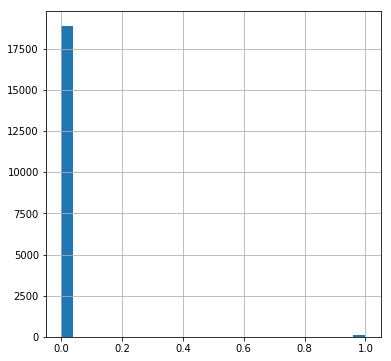

In [52]:
#checking the distribution.
df1.renovated_house.hist(figsize=(6,6),bins=25);

In [53]:
df1.head(5)

,sqft_basement,yr_renovated,condition,floors,zipcode,view,bedrooms,bathrooms,has basement,renovated_house
0,0.0,0,3,1.0,98178,0.0,3,1.00,0.0,0
1,400.0,1991,3,2.0,98125,0.0,3,2.25,1.0,0
2,0.0,0,3,1.0,98028,0.0,2,1.00,0.0,0
3,910.0,0,5,1.0,98136,0.0,4,3.00,1.0,0
4,0.0,0,3,1.0,98074,0.0,3,2.00,0.0,0


In [54]:
#changing the type to category
df1=df1.astype('category')

In [55]:
#checking the data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19017 entries, 0 to 21596
Data columns (total 10 columns):
sqft_basement      19017 non-null category
yr_renovated       19017 non-null category
condition          19017 non-null category
floors             19017 non-null category
zipcode            19017 non-null category
view               19017 non-null category
bedrooms           19017 non-null category
bathrooms          19017 non-null category
has basement       19017 non-null category
renovated_house    19017 non-null category
dtypes: category(10)
memory usage: 372.6 KB


In [56]:
#creating dummies for the categorical variables in df1
has_basement_dummies=pd.get_dummies(df1['has basement'],prefix='basement_present')
condition_dummies=pd.get_dummies(df1['condition'],prefix='condition')
floors_dummies=pd.get_dummies(df1['floors'],prefix='floors')
zipcode_dummies=pd.get_dummies(df1['zipcode'],prefix='zipcode')
view_dummies=pd.get_dummies(df1['view'],prefix='view')
bathrooms_dummies=pd.get_dummies(df1['bathrooms'],prefix='bathrooms')
bedrooms_dummies=pd.get_dummies(df1['bedrooms'],prefix='bedrooms')
renovated_house_dummies=pd.get_dummies(df1['renovated_house'],prefix='renovated_house')

#bin the zipcode or try thinking other features to make data small. 

In [57]:
df1.columns

Index(['sqft_basement', 'yr_renovated', 'condition', 'floors', 'zipcode',
       'view', 'bedrooms', 'bathrooms', 'has basement', 'renovated_house'],
      dtype='object')

In [58]:
df1.bedrooms.value_counts()

3    9579
4    6568
2    2680
1     190
Name: bedrooms, dtype: int64

In [59]:
#concatenating the dummies with df1.
df1 = pd.concat([df1,has_basement_dummies,condition_dummies,floors_dummies,zipcode_dummies,renovated_house_dummies,view_dummies,bathrooms_dummies,bedrooms_dummies],axis=1)
df1.head()

,sqft_basement,yr_renovated,condition,floors,zipcode,view,bedrooms,bathrooms,has basement,renovated_house,...,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4
0,0.0,0,3,1.0,98178,0.0,3,1.00,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,400.0,1991,3,2.0,98125,0.0,3,2.25,1.0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0,3,1.0,98028,0.0,2,1.00,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,910.0,0,5,1.0,98136,0.0,4,3.00,1.0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.0,0,3,1.0,98074,0.0,3,2.00,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
#dropping the original columns
df1=df1.drop(columns=['sqft_basement','yr_renovated','condition','floors','zipcode','has basement','renovated_house','view'])
df1.head(5)

,bedrooms,bathrooms,basement_present_0.0,basement_present_1.0,condition_1,condition_2,condition_3,condition_4,condition_5,floors_1.0,...,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4
0,3,1.00,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,3,2.25,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1.00,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,4,3.00,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
4,3,2.00,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [61]:
df1.columns

Index(['bedrooms', 'bathrooms', 'basement_present_0.0', 'basement_present_1.0',
       'condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'floors_1.0',
       ...
       'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25',
       'bathrooms_3.5', 'bathrooms_3.75', 'bedrooms_1', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_4'],
      dtype='object', length=110)

In [62]:
df1=df1.drop(columns=['bathrooms','bedrooms'])

## Treating Continuous Variables

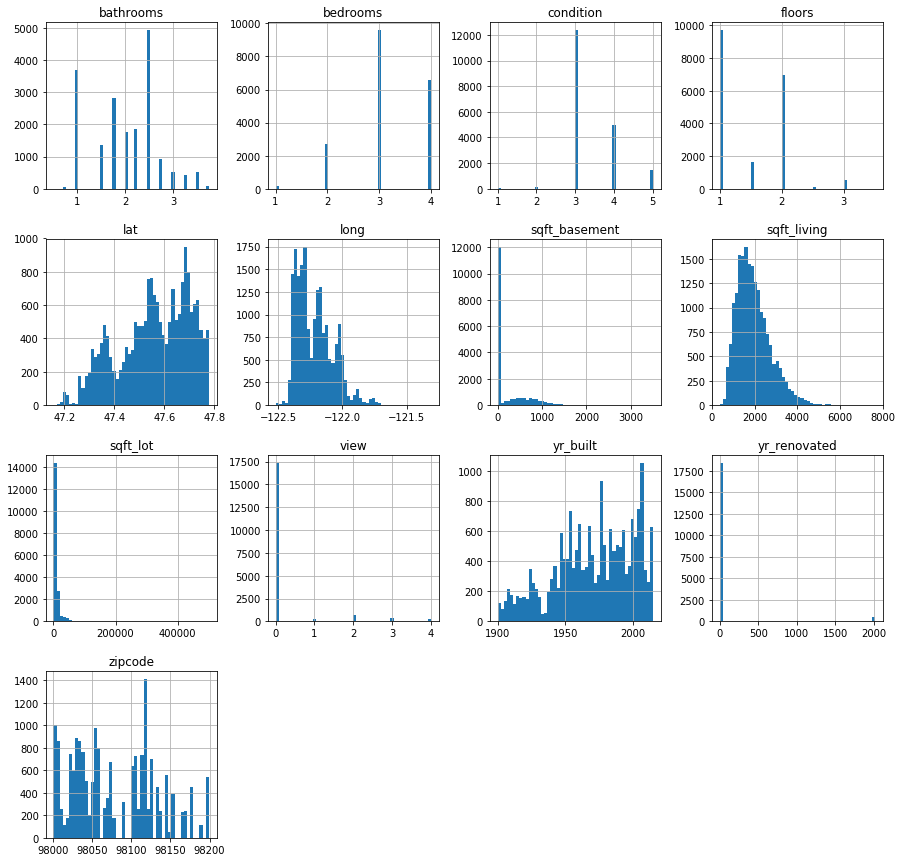

In [63]:
#looking at the variables again at distribution.

df.hist(figsize=(15,15),bins=50);

In [64]:
#Treating the continuous variables
df2= df[['sqft_living','lat','long','sqft_lot','yr_built']]

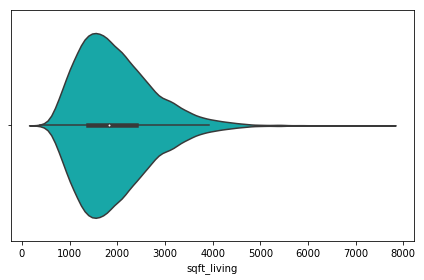

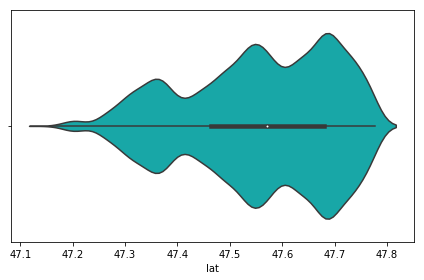

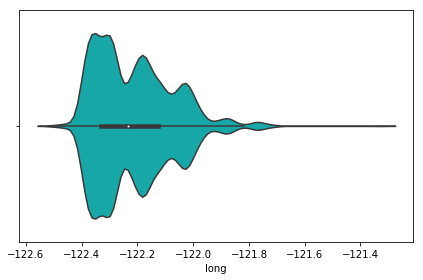

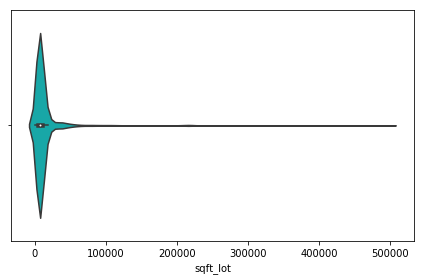

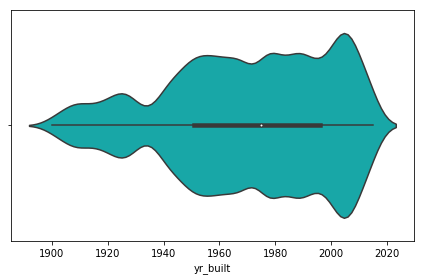

In [65]:
for column in df2:
    sns.violinplot(x=column, data=df2, color="c", whis=2)
    plt.tight_layout()
    plt.show()

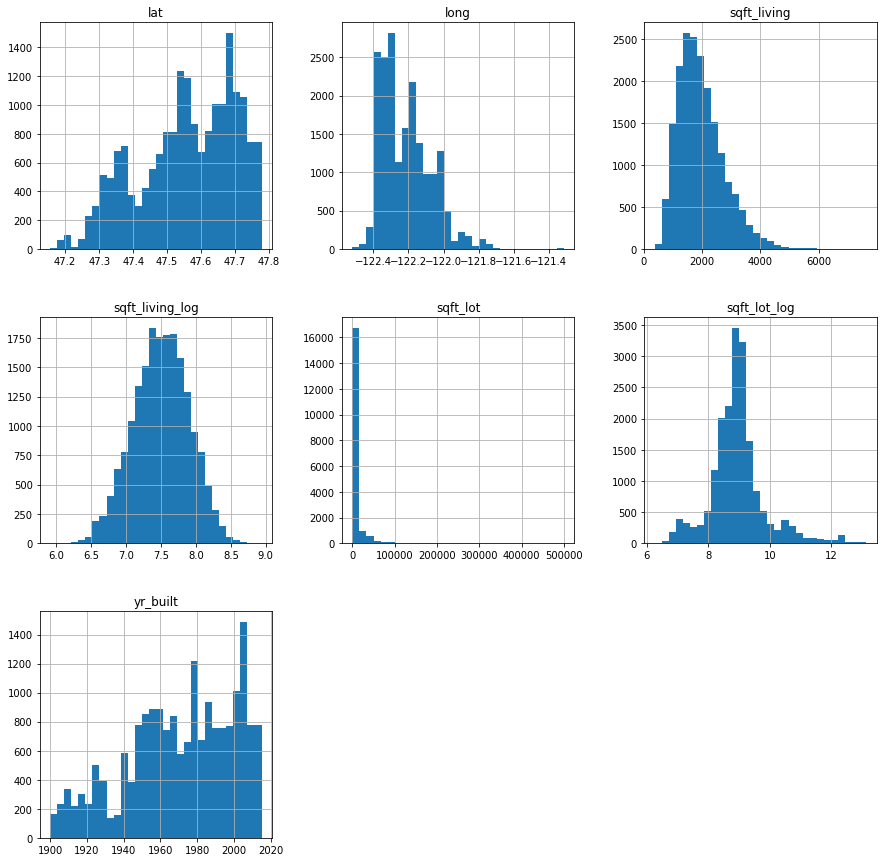

In [66]:
df2["sqft_living_log"] = np.log(df2["sqft_living"]+1)
df2["sqft_lot_log"] = np.log(df2["sqft_lot"]+1)
df2.hist(figsize  = [15, 15],bins=30);

We can see here how the skewness has reduced from the plots.

In [67]:
df2.head()

,sqft_living,lat,long,sqft_lot,yr_built,sqft_living_log,sqft_lot_log
0,1180,47.5112,-122.257,5650,1955,7.074117,8.639588
1,2570,47.7210,-122.319,7242,1951,7.852050,8.887791
2,770,47.7379,-122.233,10000,1933,6.647688,9.210440
3,1960,47.5208,-122.393,5000,1965,7.581210,8.517393
4,1680,47.6168,-122.045,8080,1987,7.427144,8.997271


In [68]:
df2=df2.drop(columns=['sqft_lot','sqft_living'])

In [69]:
target_log =np.log(target)
target_log.head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: price, dtype: float64

In [70]:
df2.head()

,lat,long,yr_built,sqft_living_log,sqft_lot_log
0,47.5112,-122.257,1955,7.074117,8.639588
1,47.7210,-122.319,1951,7.852050,8.887791
2,47.7379,-122.233,1933,6.647688,9.210440
3,47.5208,-122.393,1965,7.581210,8.517393
4,47.6168,-122.045,1987,7.427144,8.997271


In [71]:
#checking multicolinearity
df2.corr()

,lat,long,yr_built,sqft_living_log,sqft_lot_log
lat,1.000000,-0.136586,-0.150246,0.022026,-0.157149
long,-0.136586,1.000000,0.404195,0.268059,0.376311
yr_built,-0.150246,0.404195,1.000000,0.364528,-0.024969
sqft_living_log,0.022026,0.268059,0.364528,1.000000,0.308584
sqft_lot_log,-0.157149,0.376311,-0.024969,0.308584,1.000000


In [72]:
abs(df2.corr()) >= 0.75

,lat,long,yr_built,sqft_living_log,sqft_lot_log
lat,True,False,False,False,False
long,False,True,False,False,False
yr_built,False,False,True,False,False
sqft_living_log,False,False,False,True,False
sqft_lot_log,False,False,False,False,True


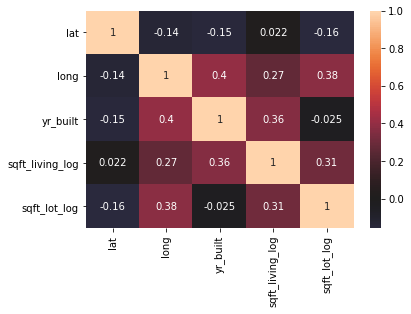

In [73]:
#checking in deep using heat map the collinearity.
sns.heatmap(df2.corr(),annot=True,center=0);

Looks good. We can go ahead with standarization of variables.

In [74]:
for col in df2:
    df2[col] = (df2[col]-np.mean(df2[col]))/np.sqrt(np.var(df2[col]))

In [75]:
df2.head()

,lat,long,yr_built,sqft_living_log,sqft_lot_log
0,-0.337259,-0.296228,-0.538905,-1.066787,-0.354857
1,1.157039,-0.732594,-0.675785,0.876697,-0.077235
2,1.277409,-0.127312,-1.291747,-2.132119,0.283659
3,-0.268884,-1.253417,-0.196703,0.200066,-0.491536
4,0.414875,1.195861,0.556140,-0.184831,0.045222


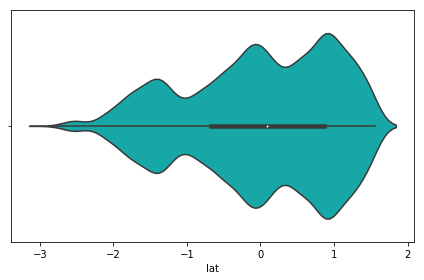

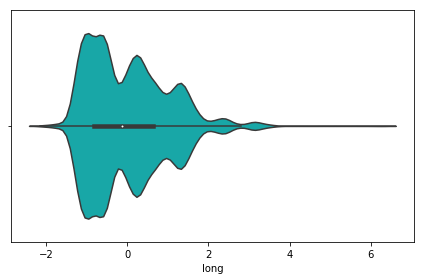

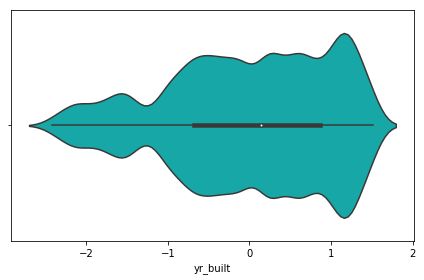

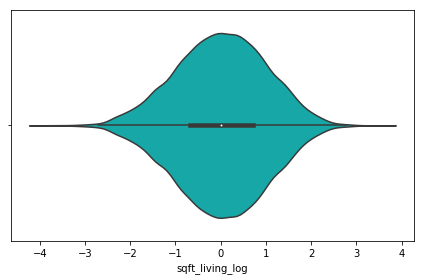

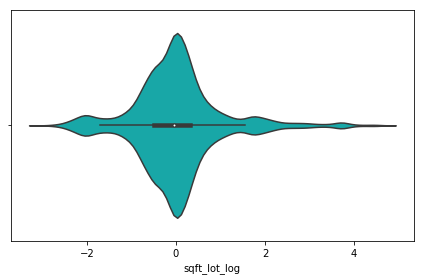

In [76]:
for column in df2:
    sns.violinplot(x=column, data=df2, color="c", whis=2)
    plt.tight_layout()
    plt.show()

Yayyy!! the plots look good now. Skewness has gone and look normally distributed.

In [77]:
df_all = df2.join(target_log)
df_all.head()

,lat,long,yr_built,sqft_living_log,sqft_lot_log,price
0,-0.337259,-0.296228,-0.538905,-1.066787,-0.354857,12.309982
1,1.157039,-0.732594,-0.675785,0.876697,-0.077235,13.195614
2,1.277409,-0.127312,-1.291747,-2.132119,0.283659,12.100712
3,-0.268884,-1.253417,-0.196703,0.200066,-0.491536,13.311329
4,0.414875,1.195861,0.556140,-0.184831,0.045222,13.142166


In [78]:
df_all.head()

,lat,long,yr_built,sqft_living_log,sqft_lot_log,price
0,-0.337259,-0.296228,-0.538905,-1.066787,-0.354857,12.309982
1,1.157039,-0.732594,-0.675785,0.876697,-0.077235,13.195614
2,1.277409,-0.127312,-1.291747,-2.132119,0.283659,12.100712
3,-0.268884,-1.253417,-0.196703,0.200066,-0.491536,13.311329
4,0.414875,1.195861,0.556140,-0.184831,0.045222,13.142166


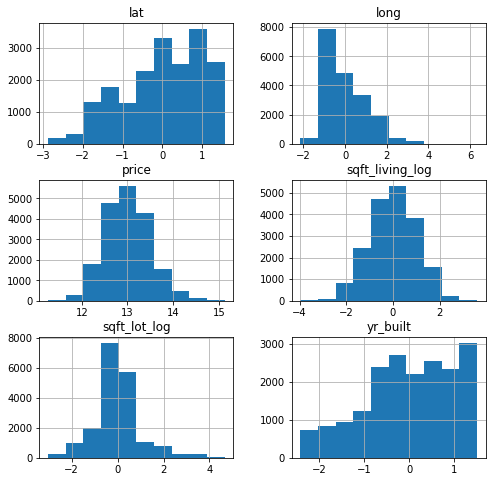

In [79]:
#checking our distribution of continuous variables. Looks normal now.
df_all.hist(figsize  = [8, 8]);

#importing all the required packages

In [80]:
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [81]:
df_features= pd.concat([df2,df1],axis=1)

In [82]:
df_features.head()

,lat,long,yr_built,sqft_living_log,sqft_lot_log,basement_present_0.0,basement_present_1.0,condition_1,condition_2,condition_3,...,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4
0,-0.337259,-0.296228,-0.538905,-1.066787,-0.354857,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1.157039,-0.732594,-0.675785,0.876697,-0.077235,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1.277409,-0.127312,-1.291747,-2.132119,0.283659,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,-0.268884,-1.253417,-0.196703,0.200066,-0.491536,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.414875,1.195861,0.556140,-0.184831,0.045222,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [83]:
df_features.columns

Index(['lat', 'long', 'yr_built', 'sqft_living_log', 'sqft_lot_log',
       'basement_present_0.0', 'basement_present_1.0', 'condition_1',
       'condition_2', 'condition_3',
       ...
       'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25',
       'bathrooms_3.5', 'bathrooms_3.75', 'bedrooms_1', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_4'],
      dtype='object', length=113)

In [84]:
df_features = df_features.drop(columns=['basement_present_0.0','condition_1','zipcode_98001','floors_1.0','renovated_house_0','view_0.0','bathrooms_3.75','bedrooms_4'])

In [85]:
df_features.describe()

,lat,long,yr_built,sqft_living_log,sqft_lot_log,basement_present_1.0,condition_2,condition_3,condition_4,condition_5,...,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bedrooms_1,bedrooms_2,bedrooms_3
count,1.901700e+04,1.901700e+04,1.901700e+04,1.901700e+04,1.901700e+04,19017.000000,19017.000000,19017.000000,19017.000000,19017.000000,...,19017.000000,19017.000000,19017.000000,19017.000000,19017.000000,19017.000000,19017.000000,19017.000000,19017.000000,19017.000000
mean,-8.518466e-13,-1.823124e-12,-6.235277e-16,5.127353e-13,-1.045863e-13,0.368407,0.008466,0.649524,0.263186,0.077352,...,0.092128,0.098491,0.259084,0.048115,0.027449,0.022717,0.027922,0.009991,0.140927,0.503707
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,0.482385,0.091624,0.477132,0.440374,0.267156,...,0.289214,0.297985,0.438143,0.214015,0.163392,0.149002,0.164755,0.099457,0.347955,0.499999
min,-2.867880e+00,-2.140225e+00,-2.421012e+00,-3.959566e+00,-3.021254e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.770022e-01,-8.170514e-01,-6.757851e-01,-6.759425e-01,-4.915357e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.296743e-02,-1.413886e-01,1.454981e-01,1.502266e-02,-3.808496e-02,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8.614555e-01,6.328085e-01,8.641208e-01,7.057919e-01,3.240777e-01,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.560172e+00,6.333714e+00,1.514303e+00,3.591345e+00,4.658308e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
for col in df_features:
    df_features[col]= df_features[col].astype('float64')    

In [87]:
target = target.astype('float64')

In [88]:
target.isna().sum()

0

# Model Building

## Model 1

In [89]:
y = target
x= df_features

In [90]:
X = sm.add_constant(x)

In [91]:
y.shape,X.shape

((19017,), (19017, 106))

In [92]:
linreg= sm.OLS(y.values,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     625.6
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:37:25   Log-Likelihood:            -2.5237e+05
No. Observations:               19017   AIC:                         5.049e+05
Df Residuals:                   18911   BIC:                         5.058e+05
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.484e+05   3.52e+04     12.754      0.000    3.79e+05    5.17e+05
lat                   2.111e+04   8295.270      2.545      0.011    4852.911    3.74e+04
long                 -3.132e+04   6021.424     -5.201      0.000   -4.31e+04   -1.95e+04
yr_built              7149.9158   1841.834      3.882      0.000    3539.757    1.08e+04
sqft_living_log       1.404e+05   2052.085     68.414      0.000    1.36e+05    1.44e+05
sqft_lot_log           3.66e+04   1570.768     23.299      0.000    3.35e+04    3.97e+04
basement_present_1.0 -4.997e+04   2780.769    -17.969      0.000   -5.54e+04   -4.45e+04
condition_2           8.873e+04   2.89e+04      3.067      0.002     3.2e+04    1.45e+05
condition_3           1.051e+05   2.68e+04      3.915      0.000    5.25e+04    1.58e+05
condition_4           1.191e+05   2.68e+04      4.438      0.000    6.65e+04    1.72e+05
condition_5           1.635e+05    2.7e+04      6.047      0.000     1.1e+05    2.16e+05
floors_1.5             148.3800   4196.698      0.035      0.972   -8077.524    8374.284
floors_2.0            5637.8167   3608.336      1.562      0.118   -1434.844    1.27e+04
floors_2.5            4.051e+04   1.41e+04      2.872      0.004    1.29e+04    6.82e+04
floors_3.0           -2.973e+04   7896.386     -3.765      0.000   -4.52e+04   -1.43e+04
floors_3.5            -7.41e+04   5.79e+04     -1.280      0.200   -1.88e+05    3.94e+04
zipcode_98002         3.756e+04   1.33e+04      2.831      0.005    1.16e+04    6.36e+04
zipcode_98003         8524.3621   1.18e+04      0.720      0.471   -1.47e+04    3.17e+04
zipcode_98004         7.361e+05   2.21e+04     33.365      0.000    6.93e+05    7.79e+05
zipcode_98005         3.743e+05   2.35e+04     15.926      0.000    3.28e+05     4.2e+05
zipcode_98006         3.351e+05   1.92e+04     17.451      0.000    2.97e+05    3.73e+05
zipcode_98007          2.82e+05   2.46e+04     11.483      0.000    2.34e+05     3.3e+05
zipcode_98008         2.845e+05   2.31e+04     12.308      0.000    2.39e+05     3.3e+05
zipcode_98010         1.191e+05   2.01e+04      5.924      0.000    7.97e+04    1.59e+05
zipcode_98011         1.065e+05   2.99e+04      3.565      0.000     4.8e+04    1.65e+05
zipcode_98014         1.049e+05   3.25e+04      3.225      0.001    4.11e+04    1.69e+05
zipcode_98019          8.13e+04   3.22e+04      2.527      0.012    1.82e+04    1.44e+05
zipcode_98022         4.936e+04   1.76e+04      2.800      0.005    1.48e+04    8.39e+04
zipcode_98023        -1.564e+04   1.09e+04     -1.434      0.152    -3.7e+04    5745.130
zipcode_98024         1.688e+05   2.89e+04      5.848      0.000    1.12e+05    2.25e+05
zipcode_98027         2.298e+05   1.97e+04     11.670      0.000    1.91e+05    2.68e+05
zipcode_98028         8.432e+04   2.89e+04      2.917    

In [93]:
linreg.params

const                   448351.463041
lat                      21112.381527
long                    -31316.054611
yr_built                  7149.915752
sqft_living_log         140391.354305
sqft_lot_log             36596.860045
basement_present_1.0    -49966.763578
condition_2              88728.449902
condition_3             105052.694907
condition_4             119149.872372
condition_5             163488.684230
floors_1.5                 148.380015
floors_2.0                5637.816718
floors_2.5               40505.787290
floors_3.0              -29733.401460
floors_3.5              -74101.778201
zipcode_98002            37556.009566
zipcode_98003             8524.362098
zipcode_98004           736082.510766
zipcode_98005           374258.439435
zipcode_98006           335096.414070
zipcode_98007           281982.954131
zipcode_98008           284536.465980
zipcode_98010           119125.977147
zipcode_98011           106527.782421
zipcode_98014           104891.234856
zipcode_9801

As we can see the model has good R square.Lets further try to remove features with p>0.05 and rerun the model.

## Model 2

In [94]:
#dropping features whose p value is less than 0.05
y = target
x= df_features.drop(['floors_1.5','floors_2.0','floors_3.5','zipcode_98003','zipcode_98023','zipcode_98032','zipcode_98070','zipcode_98092','zipcode_98188','zipcode_98198'],axis = 1)

In [95]:
X = sm.add_constant(x)

In [96]:
linreg1= sm.OLS(y.values,X).fit()
linreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     691.1
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:37:25   Log-Likelihood:            -2.5237e+05
No. Observations:               19017   AIC:                         5.049e+05
Df Residuals:                   18921   BIC:                         5.057e+05
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.601e+05   3.28e+04     14.010      0.000    3.96e+05    5.24e+05
lat                   2.353e+04   6422.819      3.663      0.000    1.09e+04    3.61e+04
long                  -2.14e+04   4343.828     -4.926      0.000   -2.99e+04   -1.29e+04
yr_built              7550.7912   1729.652      4.365      0.000    4160.519    1.09e+04
sqft_living_log       1.413e+05   1967.737     71.823      0.000    1.37e+05    1.45e+05
sqft_lot_log          3.557e+04   1490.032     23.869      0.000    3.26e+04    3.85e+04
basement_present_1.0 -5.163e+04   2496.460    -20.682      0.000   -5.65e+04   -4.67e+04
condition_2           8.842e+04   2.89e+04      3.057      0.002    3.17e+04    1.45e+05
condition_3           1.054e+05   2.68e+04      3.928      0.000    5.28e+04    1.58e+05
condition_4            1.19e+05   2.68e+04      4.433      0.000    6.64e+04    1.72e+05
condition_5           1.633e+05    2.7e+04      6.039      0.000     1.1e+05    2.16e+05
floors_2.5            3.606e+04   1.38e+04      2.609      0.009    8969.503    6.32e+04
floors_3.0           -3.466e+04   7066.650     -4.905      0.000   -4.85e+04   -2.08e+04
zipcode_98002         3.346e+04   1.13e+04      2.966      0.003    1.14e+04    5.56e+04
zipcode_98004         7.259e+05   1.67e+04     43.461      0.000    6.93e+05    7.59e+05
zipcode_98005         3.612e+05   1.87e+04     19.357      0.000    3.25e+05    3.98e+05
zipcode_98006         3.221e+05   1.43e+04     22.533      0.000    2.94e+05     3.5e+05
zipcode_98007         2.676e+05   1.99e+04     13.467      0.000    2.29e+05    3.07e+05
zipcode_98008         2.677e+05   1.78e+04     15.035      0.000    2.33e+05    3.03e+05
zipcode_98010         1.009e+05   1.74e+04      5.788      0.000    6.67e+04    1.35e+05
zipcode_98011         9.397e+04    2.3e+04      4.093      0.000     4.9e+04    1.39e+05
zipcode_98014         7.049e+04   2.61e+04      2.697      0.007    1.93e+04    1.22e+05
zipcode_98019         5.294e+04   2.53e+04      2.095      0.036    3400.344    1.02e+05
zipcode_98022         3.239e+04   1.42e+04      2.273      0.023    4461.250    6.03e+04
zipcode_98024         1.403e+05   2.43e+04      5.769      0.000    9.27e+04    1.88e+05
zipcode_98027         2.109e+05   1.51e+04     13.996      0.000    1.81e+05     2.4e+05
zipcode_98028         7.502e+04   2.16e+04      3.469      0.001    3.26e+04    1.17e+05
zipcode_98029         2.595e+05   1.73e+04     14.999      0.000    2.26e+05    2.93e+05
zipcode_98030         2.027e+04   1.05e+04      1.928      0.054    -338.162    4.09e+04
zipcode_98031         2.451e+04   1.07e+04      2.294      0.022    3563.908    4.55e+04
zipcode_98033         3.401e+05   1.85e+04     18.386      0.000    3.04e+05    3.76e+05
zipcode_98034         1.751e+05   1.96e+04      8.927    

In [97]:
linreg1.params

const                   460103.695862
lat                      23525.185739
long                    -21395.902932
yr_built                  7550.791167
sqft_living_log         141328.453209
sqft_lot_log             35566.039692
basement_present_1.0    -51631.778336
condition_2              88424.472000
condition_3             105386.219780
condition_4             118984.869781
condition_5             163256.816756
floors_2.5               36064.004239
floors_3.0              -34663.625137
zipcode_98002            33463.278428
zipcode_98004           725908.650161
zipcode_98005           361242.601506
zipcode_98006           322087.508242
zipcode_98007           267576.199283
zipcode_98008           267745.874921
zipcode_98010           100912.166248
zipcode_98011            93971.965193
zipcode_98014            70490.070163
zipcode_98019            52940.109731
zipcode_98022            32391.912858
zipcode_98024           140347.217638
zipcode_98027           210924.770487
zipcode_9802

## Model summary

- R2-78% of variance can be explained by our line
- p(F)- 0 Super unlikely that the straight constant line is better than our model

## Feature Summary

- From the model we can see that one of the important feature is sqft_living which makes sense since more the space more the expensive house will be. 
- Condition also stays important. If the house is in better condition it has more chances of getting sold.
- We also see some zipcodes important,might be because those are the prime location areas. 
- Number of bedrooms is also an important feature in determing the house price. 
- View is another one, which is number of times the house is viewed. If more times then obviously the house price will be more



- std error- means the range of errors is kindof high.
- kurtosis- measuring shape kindof high
- skew is low
